In [1]:
import pandas as pd
import numpy
import torch 
import numpy as np
from torch.utils.data import Dataset, DataLoader
import sys
sys.path.append("..")
from utils import pad_collate
from dataloader_comma import CommaDataset
from dataloader_nuscenes import NUScenesDataset
from model import VTN
import matplotlib.pyplot as plt 
from PIL import Image
import glob


/home/jessica/.local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
commda_ds = CommaDataset(dataset_type="test",
        multitask="distance",
        ground_truth="normal")
nuscenes_ds = NUScenesDataset(dataset_type="train",
        multitask="distance",
        ground_truth="normal")

In [9]:
dataloader_comma = DataLoader(commda_ds, batch_size=1, shuffle=False, num_workers=0, collate_fn=pad_collate)
dataloader_nuscenes = DataLoader(nuscenes_ds, batch_size=1, shuffle=False, num_workers=0, collate_fn=pad_collate)

In [10]:
for i, elem in enumerate(dataloader_nuscenes):
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11


In [4]:
gpu_num = 1
multitask = 'distance'
backbone = 'resnet'
concept_features = False

In [5]:
model = VTN(multitask=multitask, backbone=backbone, concept_features=concept_features, device = f"cuda:{gpu_num}")


using resnet backbone


In [6]:
checkpoint_path = '/data1/shared/jessica/data3/data/toyota/ckpts/ckpts_desirednuscenes_distance/lightning_logs/version_6/checkpoints/epoch=366-step=2569.ckpt'
ckpt = torch.load(checkpoint_path, map_location='cuda:1')
state_dict = ckpt['state_dict']

In [7]:
for key in list(state_dict.keys()):
    oldkey = key
    if oldkey[0:6] == 'model.':
        key = oldkey[6:]
        state_dict[key] = state_dict.pop(oldkey)

In [8]:
model.load_state_dict(state_dict)
model.eval()

VTN(
  (clip_model): CLIP(
    (visual): VisionTransformer(
      (conv1): Conv2d(3, 768, kernel_size=(32, 32), stride=(32, 32), bias=False)
      (ln_pre): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (transformer): Transformer(
        (resblocks): Sequential(
          (0): ResidualAttentionBlock(
            (attn): MultiheadAttention(
              (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
            )
            (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
            (mlp): Sequential(
              (c_fc): Linear(in_features=768, out_features=3072, bias=True)
              (gelu): QuickGELU()
              (c_proj): Linear(in_features=3072, out_features=768, bias=True)
            )
            (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          )
          (1): ResidualAttentionBlock(
            (attn): MultiheadAttention(
              (out_proj): NonDynamicallyQuantizableLi

In [9]:
for batch in dataloader_nuscenes:
    _, image_array, vego, angle, distance, m_lens, i_lens, s_lens, a_lens, d_lens = batch
    logits, attns = model(image_array, angle, distance, vego)
    break

torch.Size([1, 70, 515]) ss
; 8
torch.Size([1, 80, 515])


In [10]:
att = attns[0].squeeze().detach()

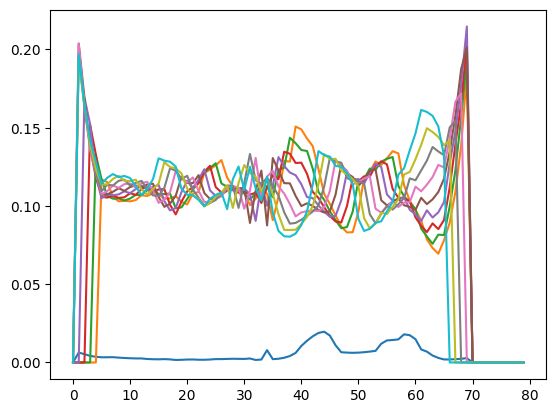

In [11]:
plt.plot(att[0])

In [12]:

def get_aligned_attention(attention):
    sequence_length = attns[0].shape[3]
    window_size = 8
    overlap = 4
    global_attended_token = 1
    padding_tokens = 8
    # Calculate the number of chunks
    number_of_chunks = np.ceil((sequence_length - window_size + overlap + 1) / (window_size - overlap)).astype(int)

    # Create an empty alignment array
    alignment_array = np.zeros((sequence_length + 2 * window_size , sequence_length + 2 * window_size), dtype=float)

    # Iterate over each chunk and extract attended token index
    for chunk_idx in range(number_of_chunks):
        # Calculate the start and end indices of the chunk
        start_index = chunk_idx * (window_size - overlap)
        end_index = start_index + window_size
        alignment_array[chunk_idx, start_index:end_index] = attention[chunk_idx]
    return alignment_array



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

IndexError: index 26 is out of bounds for axis 0 with size 26

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

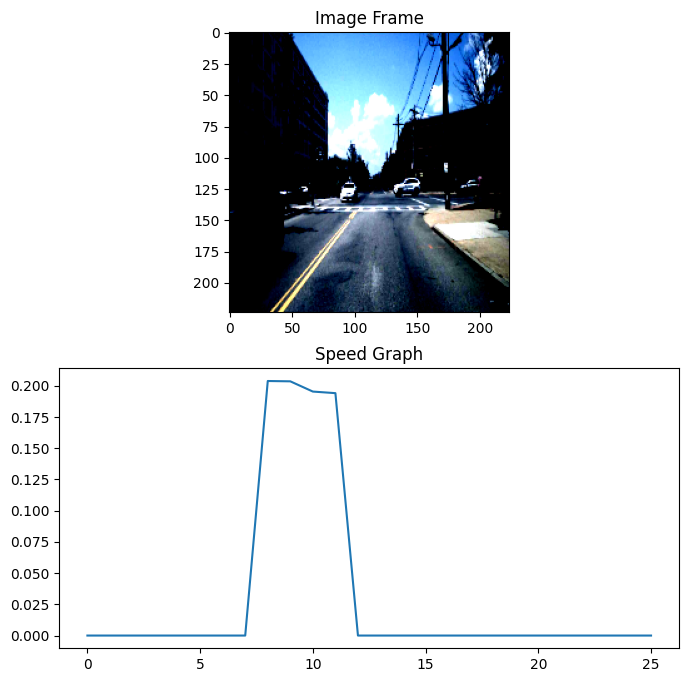

In [14]:
# Assuming you have a speed graph as a 1D array
alignment_array = get_aligned_attention(att[:, :, 1:-1][0])
speed_graph = alignment_array.sum(axis=0)

for i, image in enumerate(image_array[0]): 
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))

    # Assuming you have an image frame
    image_frame = image.permute(1,2,0)

    # Display the image frame
    ax1.imshow(image_frame)
    ax1.set_title("Image Frame")

    # Generate x-axis values for the speed graph
    x = np.arange(len(speed_graph))

    # Plot the speed graph
    ax2.plot(x, speed_graph)
    ax2.set_title("Speed Graph")

    # Choose a specific time and corresponding speed value to display
    time_step = i
    speed_value = speed_graph[time_step]

    # Add text annotation to the plot at the specified time step
    ax2.plot(time_step, speed_value, marker='o', markersize=10, color='r')

    # Adjust the plot layout if necessary
    plt.tight_layout()

    # Show the plot
    plt.savefig(f"/home/jessica/personalized_driving_toyota/result_images/attention/{i}.png")
    plt.clf()


In [ ]:


# Set the path to the directory containing the images
image_directory = '/home/jessica/personalized_driving_toyota/result_images/attention'

# Set the output GIF file path
output_gif_path = '/home/jessica/personalized_driving_toyota/result_images/attention.gif'

# Set the duration (in milliseconds) for each frame in the GIF
frame_duration = 200

# Get a sorted list of image files in the directory
image_files = sorted(glob.glob(f'{image_directory}/*.png'))  # Adjust the file extension if necessary

# Create a list to store the frames of the GIF
frames = []

# Iterate over each image file
for image_file in image_files:
    # Open the image file
    image = Image.open(image_file)

    # Add the image to the list of frames
    frames.append(image)

# Save the frames as a GIF
frames[0].save(output_gif_path, format='GIF', append_images=frames[1:], save_all=True,
               duration=frame_duration, loop=0)


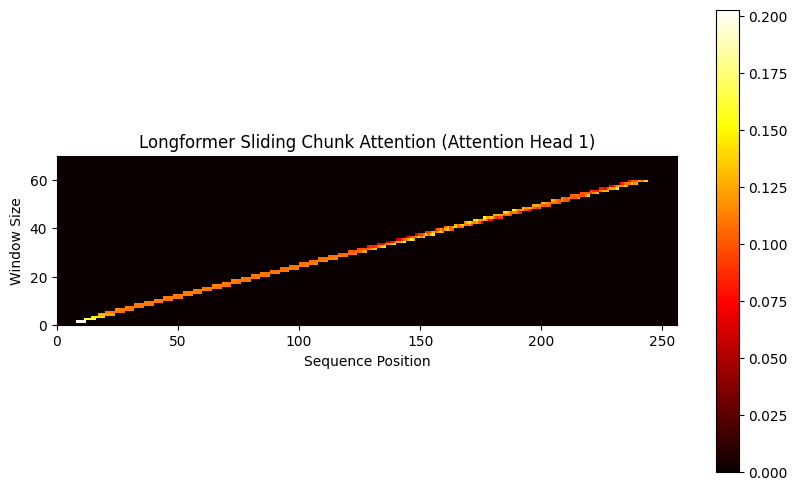

In [114]:
attention_weights = att
import numpy as np
import matplotlib.pyplot as plt

normalized_weights = attention_weights#np.array(attention_weights) / np.sum(attention_weights)

# Create the heatmap
fig, ax = plt.subplots(figsize=(10, 6))
#alignment_array[0:70, :]
heatmap = ax.pcolormesh(alignment_array[0:70, :], cmap='hot')
ax.set_aspect('equal')
# Add colorbar
cbar = plt.colorbar(heatmap)

# Add labels and title
ax.set_xlabel('Sequence Position')
ax.set_ylabel('Window Size')
ax.set_title('Longformer Sliding Chunk Attention (Attention Head 1)')

# Show the plot
plt.show()



(256,)

In [50]:
normalized_weights[0].shape

for elem in normalized_weights[0]:

(256, 10)

IndexError: too many indices for array: array is 3-dimensional, but 4 were indexed

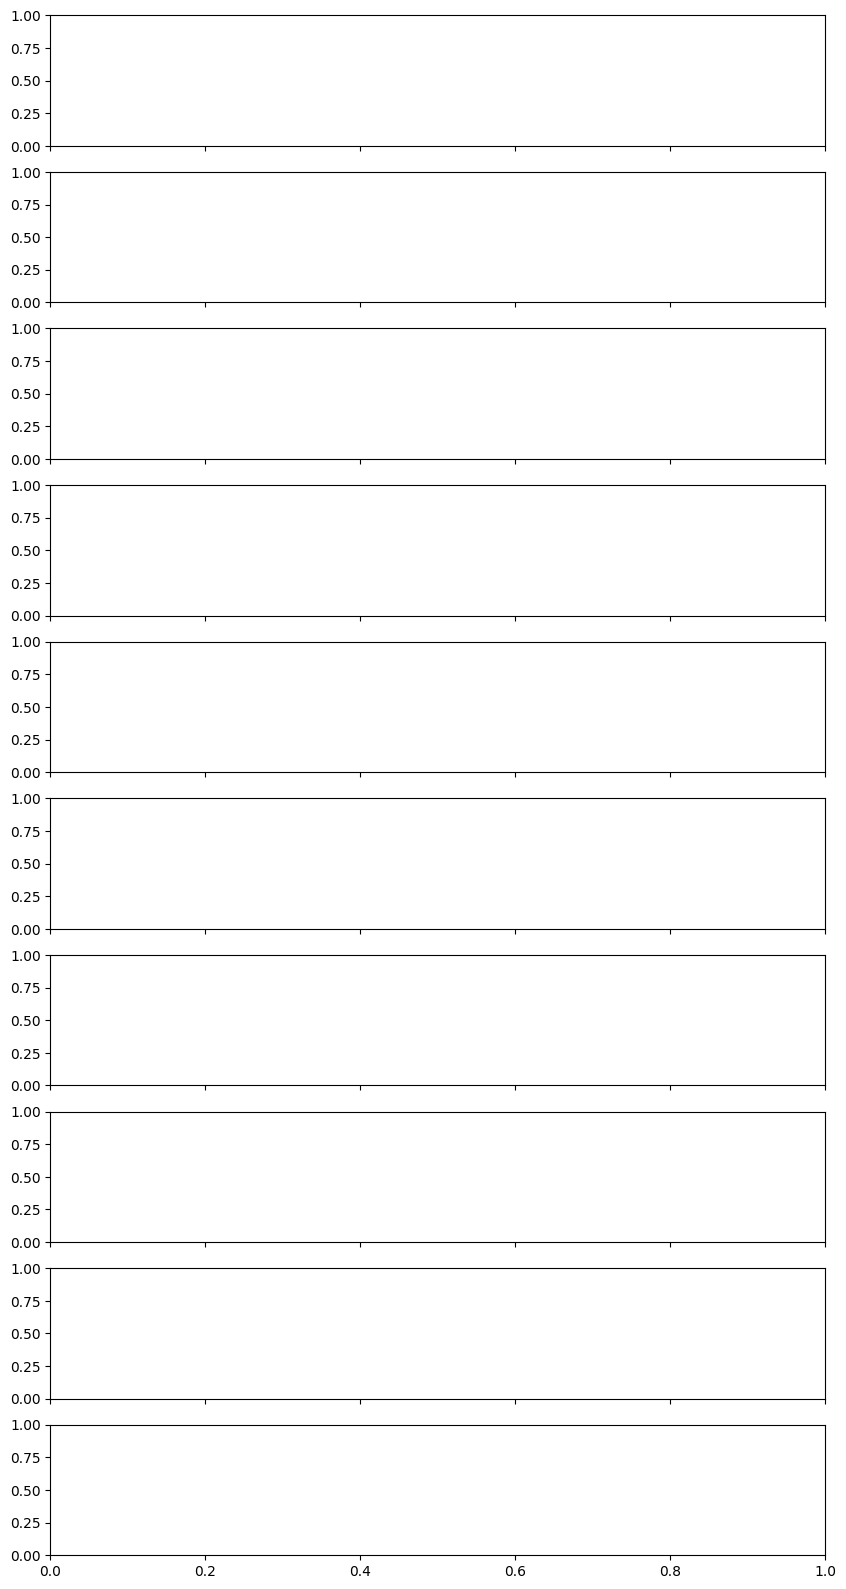

In [47]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have the attention_weights with dimensions (1, seq_length, window_size)

# Normalize the attention weights
normalized_weights = np.array(attention_weights) / np.sum(attention_weights)

# Get the sequence length and window size
seq_length = normalized_weights.shape[1]
window_size = normalized_weights.shape[2]

# Create a grid of subplots
fig, axs = plt.subplots(window_size, figsize=(10, window_size*2), sharex=True)

# Iterate through each window size
for window_idx in range(window_size):
    # Create a grid for positions to align the same position across subplots
    positions = np.arange(seq_length)

    # Plot the attention weights and align positions
    axs[window_idx].pcolormesh(positions, positions, normalized_weights[0, :, window_idx, :], cmap='hot')

    # Add labels and title for each subplot
    axs[window_idx].set_xlabel('Sequence Position')
    axs[window_idx].set_ylabel('Sequence Position')
    axs[window_idx].set_title(f'Window Size {window_idx+1}')

    # Set the y-axis limits to align positions
    axs[window_idx].set_ylim(0, seq_length-1)

    # Show the colorbar for the last subplot
    if window_idx == window_size - 1:
        fig.colorbar(axs[window_idx].collections[0], ax=axs[window_idx])

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [47]:
def mse_loss(input, target, mask, reduction="mean"):
        out = (input[~mask]-target[~mask])**2
        return out.mean() if reduction == "mean" else out 

In [48]:
#This fetches all the models and checkpoints, predicts on the test set and combines the results into a table
# The table shows 

Algorithm | Backbone | Task RMSE | Concept Accuracy

SyntaxError: invalid syntax (2254314122.py, line 4)